# HOUSING: PRICE PREDICTION

# Problem Statement:
    
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
    
• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?


# Business Goal:
    
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 

• You need to find important features which affect the price positively or negatively.

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [83]:
#Loading of train dataset

df_train = pd.read_csv('Housing_train.csv')

# Looking at the train dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [84]:
# Checking shape of data
df_train.shape

(1168, 81)

This dataset contains 1168 rows and 81 column.
From the problem statment it is very much clear that the sale price is the target column.

In [85]:
#Loading of test dataset
df_test=pd.read_csv('Housing_test.csv')

# Looking at the test dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_test.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

When upon checking for the target column in test data set the entire column of sale price seems to be missing.

In [86]:
# Checking shape of data
df_test.shape

(292, 80)

There are 292 rows and 80 column since the target column is missing i.e, salePrice.

In [87]:
# checking for column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Explaining the shortforms used for refference:
  
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [88]:
# Checking for the null values in train data
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

The following columns of the train dataset contains missing values:
1. LotFrontage
2. Alley
3. MasVnrType
4. MasVnrArea
5. BsmtQual
6. BsmtCond
7. BsmtExposure
8. BsmtFinType1
9. BsmtFinType2
10. FireplaceQu
11. GarageType
12. GarageYrBlt
13. GarageFinish
14. GarageQual
15. GarageCond
16. PoolQC
17. Fence
18. MiscFeature

In [89]:
# Checking for the null values of test Dataset.

df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

The following columns of the test dataset contains null values:

1. LotFrontage
2. Alley
3. MasVnrType
4. MasVnrArea
5. BsmtQual
6. BsmtCond
7. BsmtExposure
8. BsmtFinType1
9. BsmtFinType2
10. Electrical
11. FireplaceQu
12. GarageType
13. GarageYrBlt
14. GarageFinish
15. GarageQual
16. GarageCond
17. PoolQC
18. Fence
19. MiscFeature


In [90]:
# Checking for the datatypes of the Train dataset:

df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [91]:
# Checking for the datatype of the test dataset.

df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [92]:
# Checking for the informations of the Train Dataset: 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

3 columns are of float datatype, 35 columns are of integer datatype and 43 columns are of object datatype.
The target column "

In [93]:
# Checking for the information of the Test Dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

4 columns are of float datatype, 34 columns are of interger datatype, and 42 columns are object datatype.

# Since both the train data and the test data requires data cleaning, processing, skew correction we can concatinate both, perform all the operations and again split them for training and testing.

In [94]:
# Concat both the dataset
df = pd.concat([df_train,df_test], ignore_index=True)

In [95]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [96]:
df.shape

(1460, 81)

In [97]:
# Checking for numerical and categorical features.

numerical = df.select_dtypes(include=[np.number]).columns
categorical = df.select_dtypes(include=[np.object]).columns
print('The numerical features are: \n ', numerical, '\n ', '-'*70, '\n The categorical features are: \n ', categorical)

The numerical features are: 
  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
  ---------------------------------------------------------------------- 
 The categorical features are: 
  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType'

In [98]:
# Checking for the missing values 

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [99]:
# Handling missing values of numeric columns
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [100]:
#filling the null values of categorical columns
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [101]:
#columns which are filled by NaN's more than 60%
df['PoolQC'].fillna('NA', inplace=True)
df['MiscFeature'].fillna('NA', inplace=True)
df['Alley'].fillna('NA', inplace=True)
df['Fence'].fillna('NA', inplace=True)

In [102]:
#Checking again for any null values present
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

However lets do not alter the salePrice column as it is from the test data where the entire column is absent.

<AxesSubplot:>

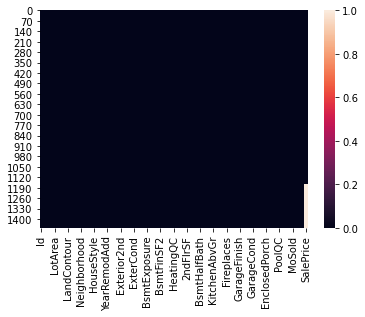

In [103]:
sns.heatmap(df.isnull())

However lets do not alter the salePrice column as it is from the test data where the entire column is absent.

# Data Visualization

In [104]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL    70.049958     4928   Pave    NA      IR1   
1  889          20       RL    95.000000    15865   Pave    NA      IR1   
2  793          60       RL    92.000000     9920   Pave    NA      IR1   
3  110          20       RL   105.000000    11751   Pave    NA      IR1   
4  422          20       RL    70.049958    16635   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [105]:
#checking number of categories in categorical columns
for i in categorical:
    print('The types of classes in {} categorical column are {} \n'.format(i,df[i].value_counts()))

The types of classes in MSZoning categorical column are RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

The types of classes in Street categorical column are Pave    1454
Grvl       6
Name: Street, dtype: int64 

The types of classes in Alley categorical column are NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 

The types of classes in LotShape categorical column are Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

The types of classes in LandContour categorical column are Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

The types of classes in Utilities categorical column are AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

The types of classes in LotConfig categorical column are Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

The types of classes in LandSlope categorica

In [106]:
#checking number of categories in categorical columns
for i in categorical:
    print('The number of categories in {} column are {}'.format(i,len(df[i].unique())))

The number of categories in MSZoning column are 5
The number of categories in Street column are 2
The number of categories in Alley column are 3
The number of categories in LotShape column are 4
The number of categories in LandContour column are 4
The number of categories in Utilities column are 2
The number of categories in LotConfig column are 5
The number of categories in LandSlope column are 3
The number of categories in Neighborhood column are 25
The number of categories in Condition1 column are 9
The number of categories in Condition2 column are 8
The number of categories in BldgType column are 5
The number of categories in HouseStyle column are 8
The number of categories in RoofStyle column are 6
The number of categories in RoofMatl column are 8
The number of categories in Exterior1st column are 15
The number of categories in Exterior2nd column are 16
The number of categories in MasVnrType column are 4
The number of categories in ExterQual column are 4
The number of categories i

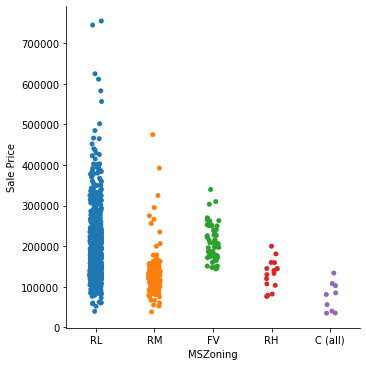

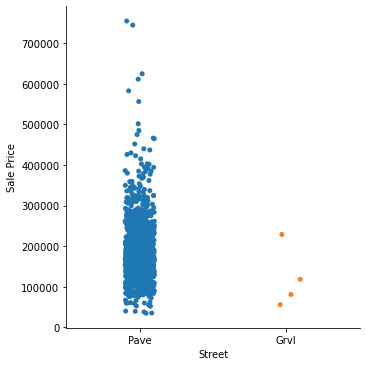

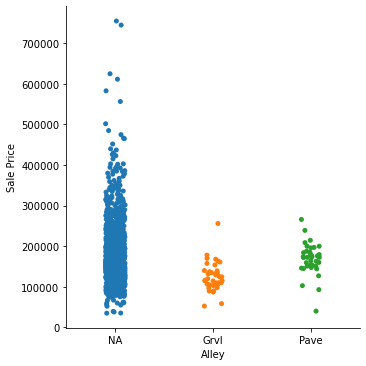

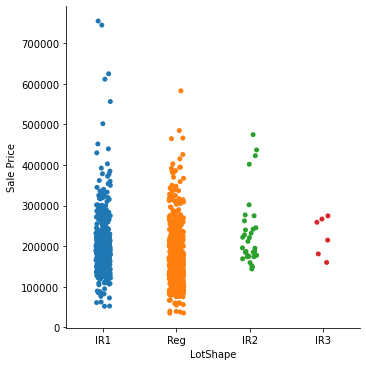

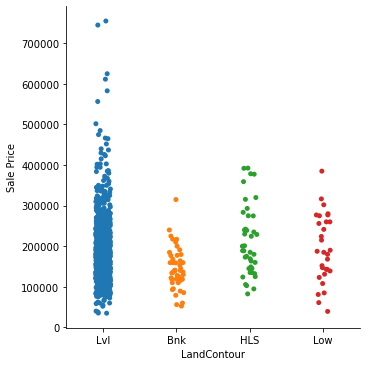

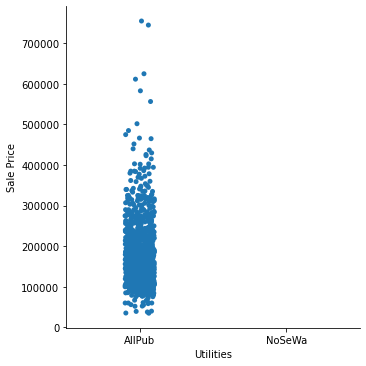

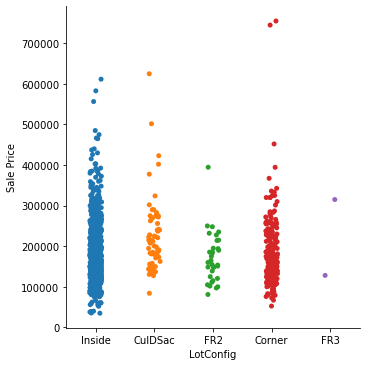

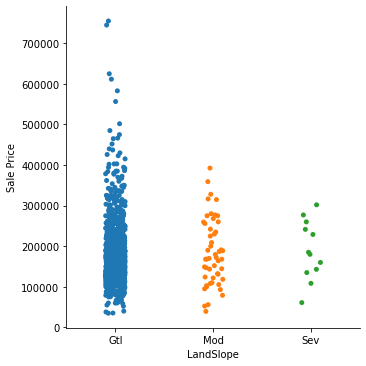

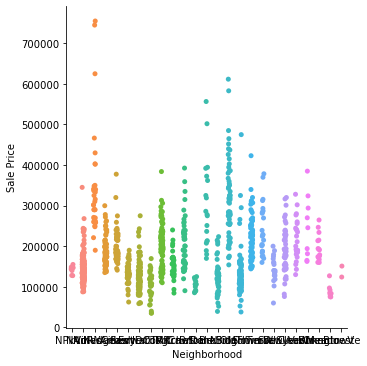

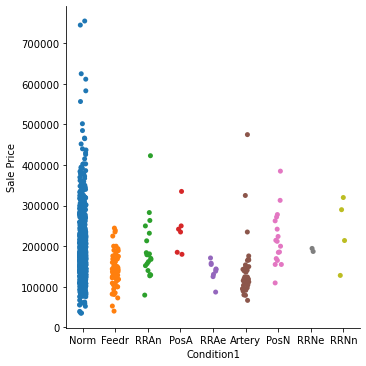

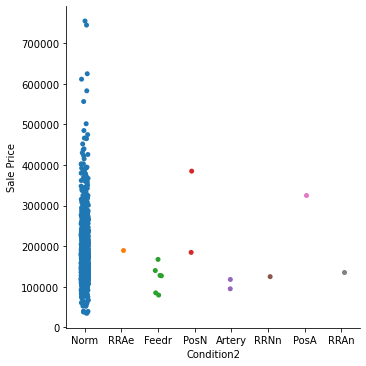

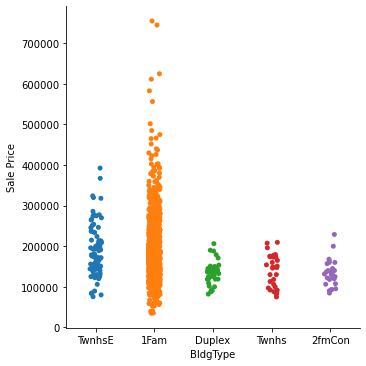

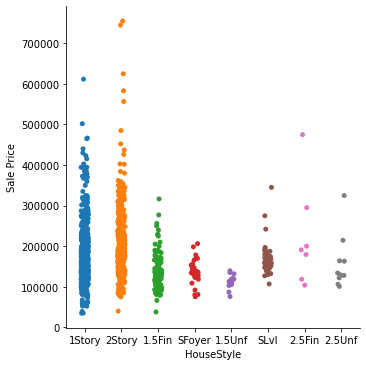

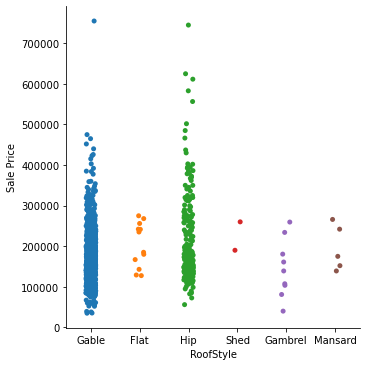

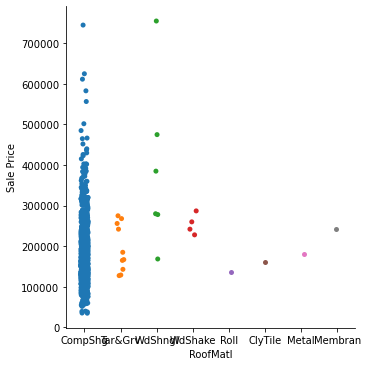

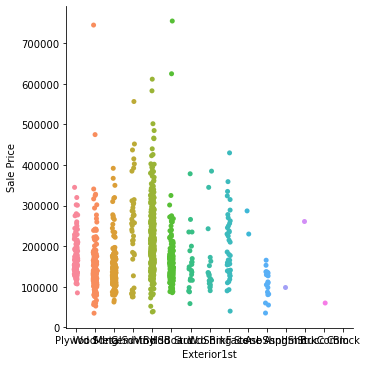

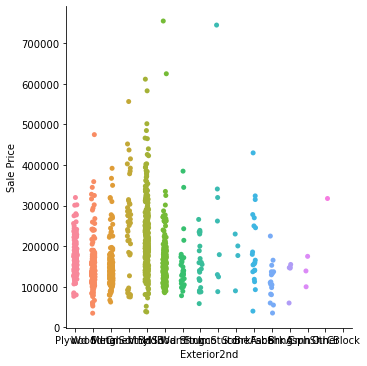

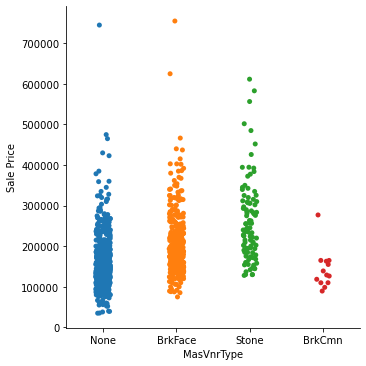

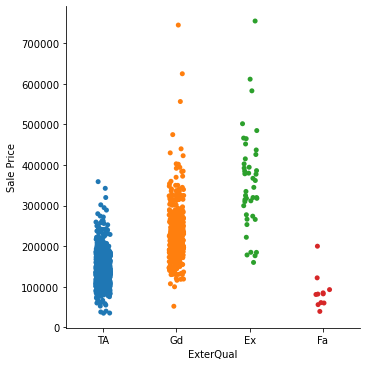

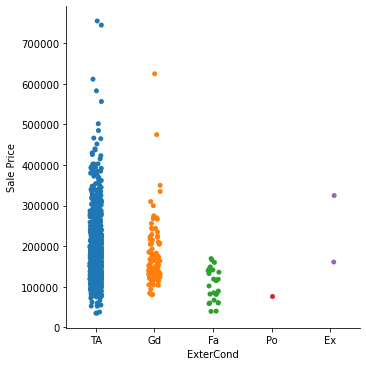

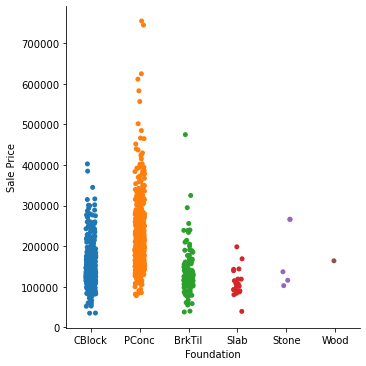

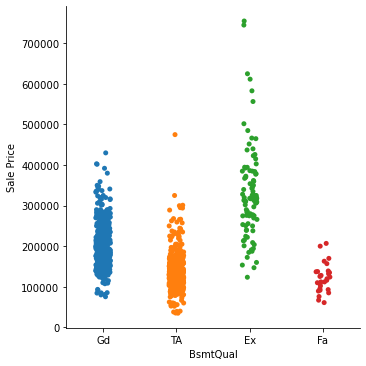

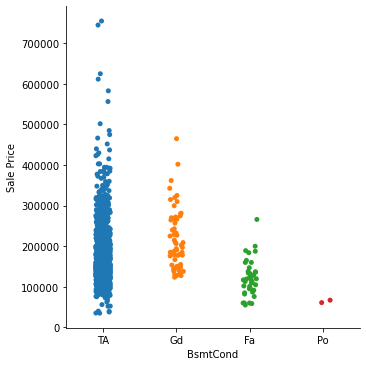

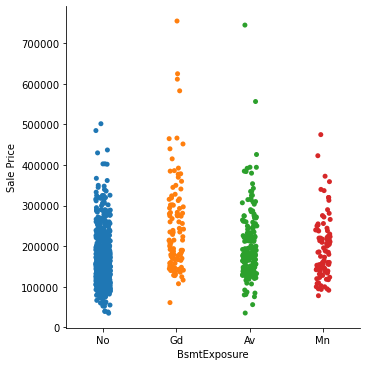

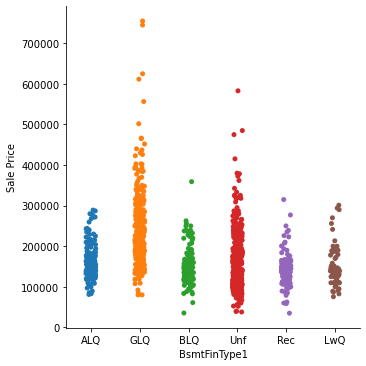

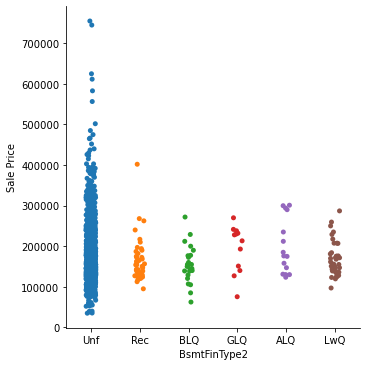

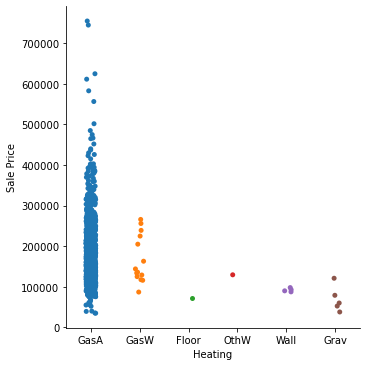

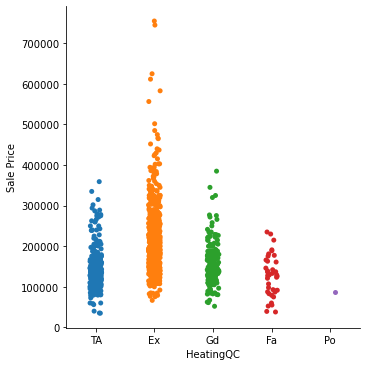

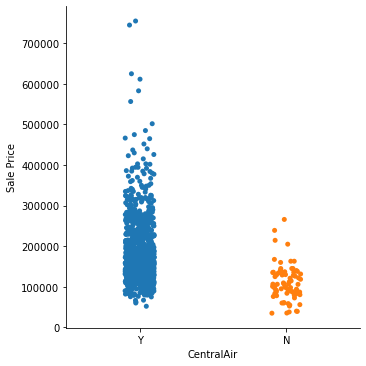

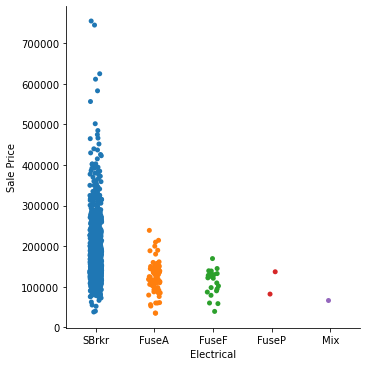

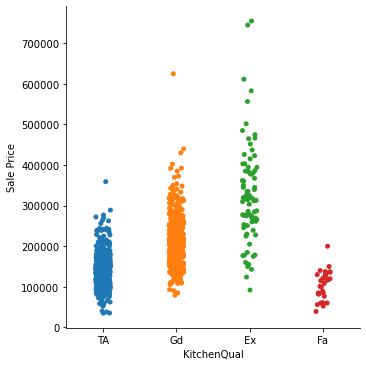

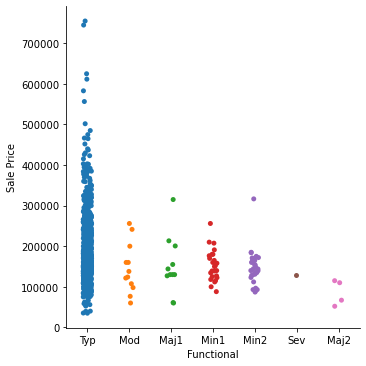

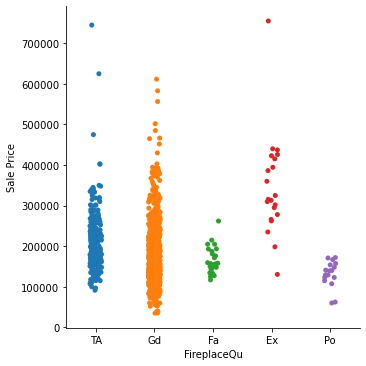

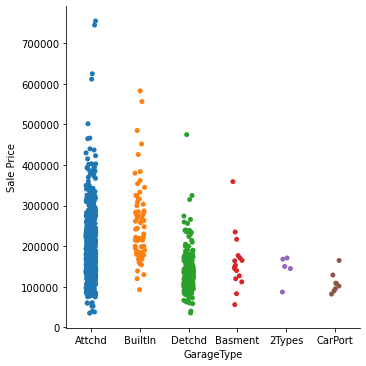

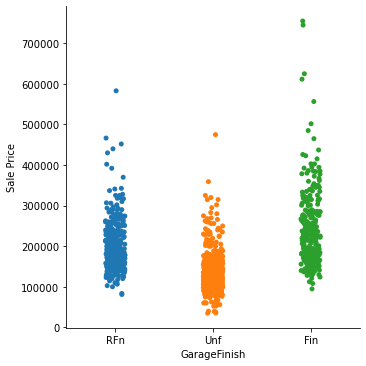

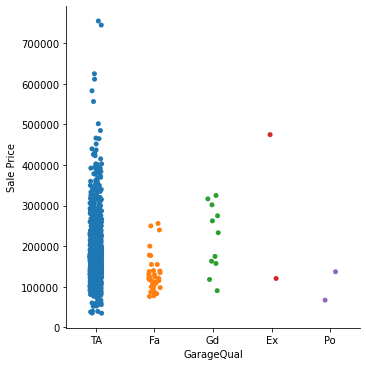

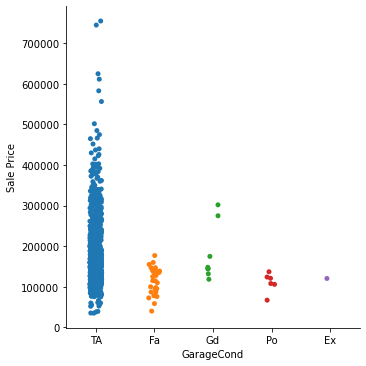

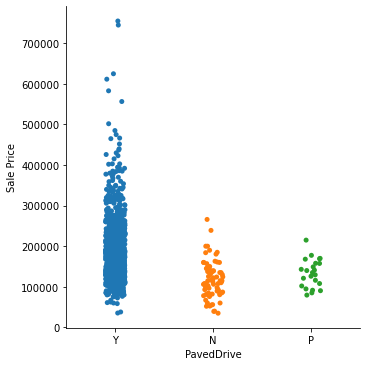

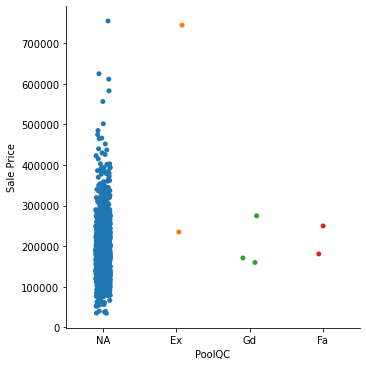

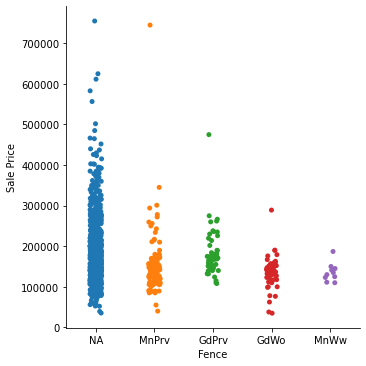

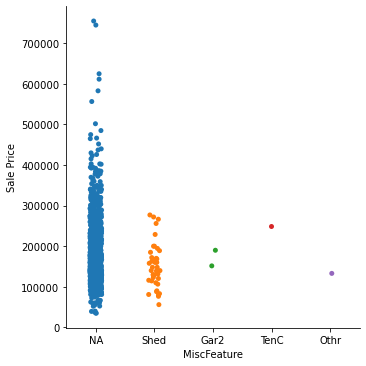

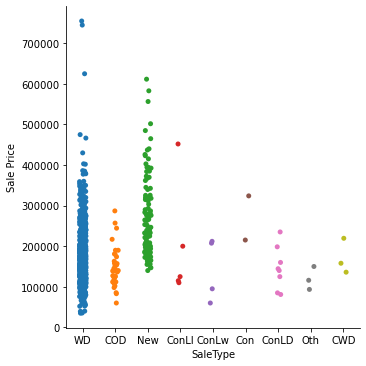

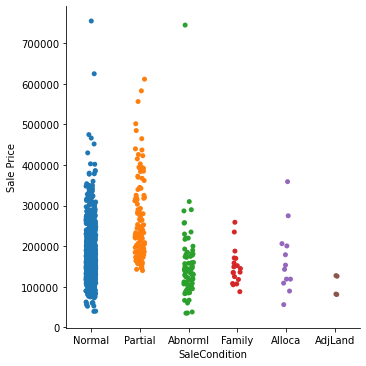

In [107]:
#plotting Strip plots on categorical variables
for i in categorical:
    sns.catplot(x=i,y='SalePrice',data=df)
    plt.xlabel(i)
    plt.ylabel('Sale Price')
    plt.show()

In [108]:
# Dropping the alley column
df = df.drop(['Alley'], axis=1)

# Dropping the 'Utilities' column
df = df.drop(['Utilities'], axis=1)

df.head() # Checking the dataset after removing columns.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL    70.049958     4928   Pave      IR1         Lvl   
1  889          20       RL    95.000000    15865   Pave      IR1         Lvl   
2  793          60       RL    92.000000     9920   Pave      IR1         Lvl   
3  110          20       RL   105.000000    11751   Pave      IR1         Lvl   
4  422          20       RL    70.049958    16635   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
4       FR2       Gtl       NWAmes       Norm       Norm     1Fam     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            5       1976          1976     Gable  CompShg   
1            8            6       1970          1970      Flat  Tar&Grv   
2            7            5       1996          1997     Gable  CompShg   
3            6            6       1977          1977       Hip  CompShg   
4            6            7       1977          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Plywood     Plywood       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2     MetalSd     MetalSd       None         0.0        Gd        TA   
3     Plywood     Plywood    BrkFace       480.0        TA        TA   
4     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1        

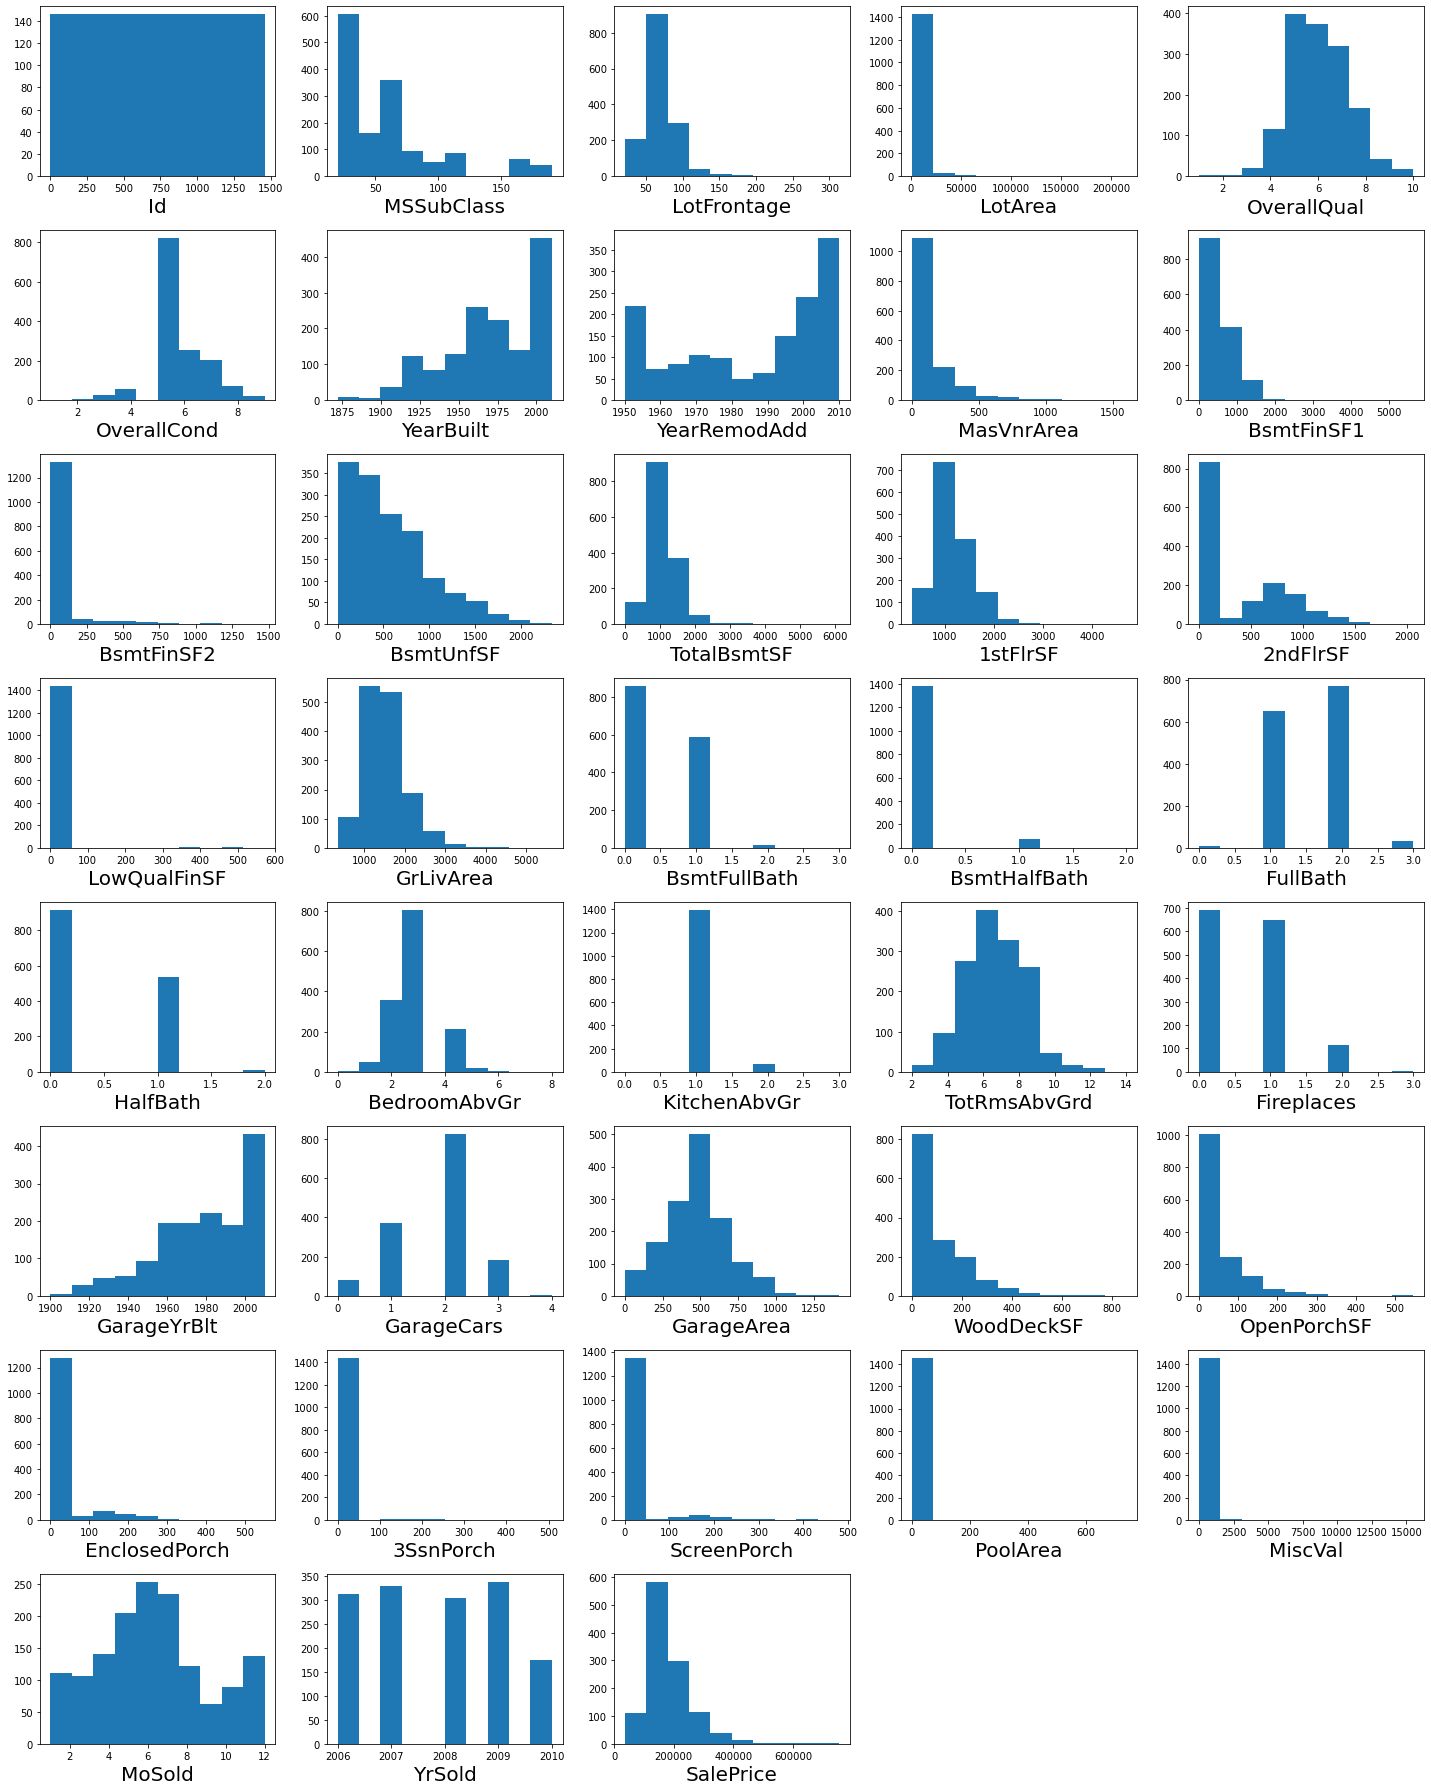

In [109]:
#Lets again check for data using histogram plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in numerical:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        plt.hist(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observations of the plot.

1. We can see that the maximum number of general zoning classification of the sale is Residential Low Density (RL) and the minimum is for the commercial.

2. - For Residential Low Density (RL), the maximum prices are ranging between 50,000 to 4,00,000.

  - For Floating Village Residential (FV), the maximum prices are ranging between 150000 to 250000.
  
3. we can observe that the property with the road access of Pave is in more demand and so its price is also high.

4. We can see that approx almost all property have no alley access.

5. We can see that most of the properties are of regular shape.
   Few properties are of slightly irregular shape.
   
6. Most of the properties are of near flat level.

7. We can see that approx 100% properties have all public Utilities (E,G,W,& S). So, we can drop this column as this will not contribute to the dataset in the model building.

8. Approx all properties have inside lot configuration.
   many properties have corner lot.
   Only few properties have frontage on 3 sides of property.
   
9. The maximum gentle slope type properties having the sale price ranging between 100000 to 300000.
   
10. Maximum properties are having North Ames.
    Only 2 properties are having Bluestem.
    
11. Single-family Detached dewlling is most popular.
    Two-family Conversion; originally built as one-family dwelling is least         popular.
    
12. One story style of houses are most popular.
    Two and one-half story: 2nd level finished style of house is least popular. 
    
13.  Most of the houses are rated 5 which means the overall material and finish of the houses are average and above average.
     Very few houses was rated 1 which says the overall material and finish of       very few houses are very poor.

14.  Most of the houses are rated average and above average for the overall condition of the house.
     None of the houses got the ratings of very excellent.

15.  We can see that as the ratings are increasing the price of the property is also increasing.

16. Maximum houses having Gable type of roof.

17. We can see that the most of the roof are made up of Standard (Composite) Shingle.
    The highest price of the house having Gable roof type and the material of the roof is Wood Shingles.

18. Most of the houses have no masonry veneer.

19. Most of the houses are of average/typical quality of the material on the exterior.
    None houses have poor quality of material on the exterior.
    
20.  Most of the houses having central air conditioning

21.  Most of the houses are having the electrical system of standard circuit breakers and romex.

22. Maximum home have typical functionality.

23. Most of the sale type are Warranty Deed - Conventional.

24. Most of the sale are normal sale.

# Label Encoding of catagorical columns


In [110]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_columns = ('MSZoning', 'Street','LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

for c in cat_columns:
    le.fit(list(df[c].values))
    le.classes_
    df[c] = le.transform(list(df[c].values))

In [111]:
# Checking the dataset again after label encoding
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3    70.049958     4928       1         0   
1  889          20         3    95.000000    15865       1         0   
2  793          60         3    92.000000     9920       1         0   
3  110          20         3   105.000000    11751       1         0   
4  422          20         3    70.049958    16635       1         0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0            3          4          0            13           2           2   
1            3          4          1            12           2           2   
2            3          1          0            15           2           2   
3            3          4          0            14           2           2   
4            3          2          0            14           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           2            6            5       1976          1976   
1         0           2            8            6       1970          1970   
2         0           5            7            5       1996          1997   
3         0           2            6            6       1977          1977   
4         0           2            6            7       1977          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1            9           10           2         0.0   
1          0         5           13           14           2         0.0   
2          1         1            8            8           2         0.0   
3          3         1            9           10           1       480.0   
4          1         1            5            5           3       126.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         3             3   
1          2          2           2         3         1             1   
2          2          4           2         2         3             0   
3          3          4           1         2         3             3   
4          2          4           1         2         3             3   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         120             5           0        958         1078   
1             0         351             4         823       1043         2217   
2             2         862             5           0        255         1117   
3             1         705             5           0       1139         1844   
4             0        1246             5           0        356         1602   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          4           1           4       958         0   
1        1          0           1           4      2217         0   
2        1          0           1           4      1127       886   
3        1          0           1           4      1844         0   
4        1          2           1           4      1602         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             5           6   
1             4             1            2             8           6   
2             3             1            3             8           6   
3             3             1            3             7           6   
4     

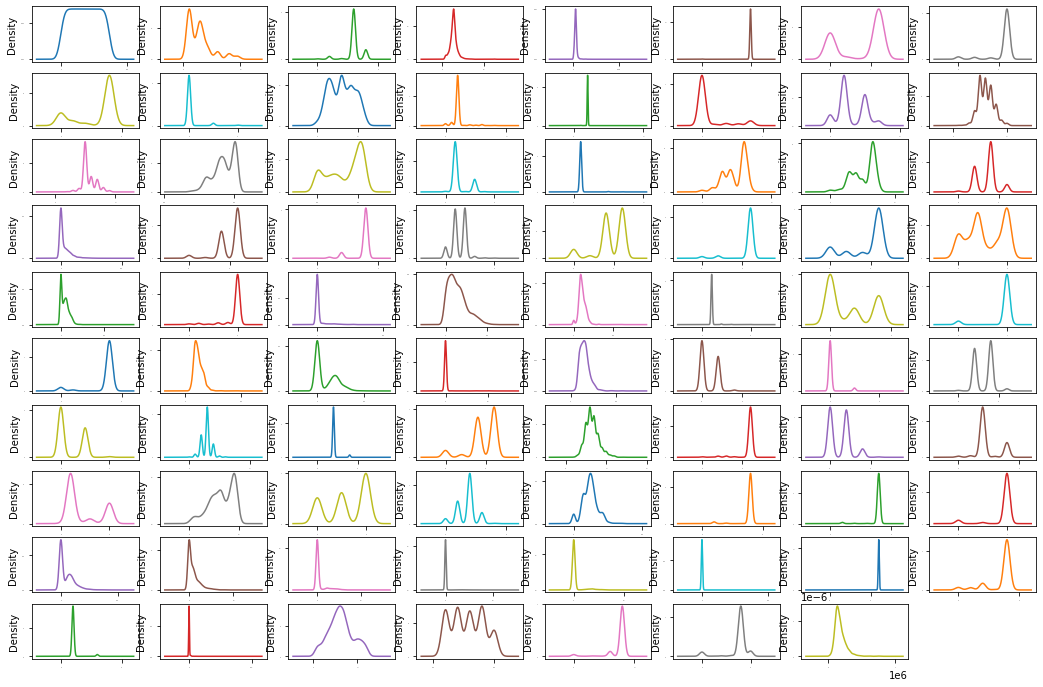

In [112]:
#Checking for skewness
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

In [113]:
# Checking for the stastical summary of the dataset.
df.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean    730.500000    56.897260     3.028767    70.049958   10516.828082   
std     421.610009    42.300571     0.632017    22.024023    9981.264932   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     365.750000    20.000000     3.000000    60.000000    7553.500000   
50%     730.500000    50.000000     3.000000    70.049958    9478.500000   
75%    1095.250000    70.000000     3.000000    79.000000   11601.500000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street     LotShape  LandContour    LotConfig    LandSlope  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.995890     1.942466     2.777397     3.019178     0.062329   
std       0.063996     1.409156     0.707666     1.622634     0.276232   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     3.000000     2.000000     0.000000   
50%       1.000000     3.000000     3.000000     4.000000     0.000000   
75%       1.000000     3.000000     3.000000     4.000000     0.000000   
max       1.000000     3.000000     3.000000     4.000000     2.000000   

       Neighborhood   Condition1   Condition2     BldgType   HouseStyle  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      12.251370     2.031507     2.008219     0.493151     3.038356   
std        6.013735     0.868515     0.259040     1.198277     1.911305   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        7.000000     2.000000     2.000000     0.000000     2.000000   
50%       12.000000     2.000000     2.000000     0.000000     2.000000   
75%       17.000000     2.000000     2.000000     0.000000     5.000000   
max       24.000000     8.000000     7.000000     4.000000     7.000000   

       OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      6.099315     5.575342  1971.267808   1984.865753     1.410274   
std       1.382997     1.112799    30.202904     20.645407     0.834998   
min       1.000000     1.000000  1872.000000   1950.000000     0.000000   
25%       5.000000     5.000000  1954.000000   1967.000000     1.000000   
50%       6.000000     5.000000  1973.000000   1994.000000     1.000000   
75%       7.000000     6.000000  2000.000000   2004.000000     1.000000   
max      10.000000     9.000000  2010.000000   2010.000000     5.000000   

          RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.075342     9.624658    10.339726     1.762329   103.685262   
std       0.599127     3.197659     3.540570     0.614274   180.569112   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     8.000000     8.000000     1.000000     0.000000   
50%       1.000000    12.000000    13.000000     2.000000     0.000000   
75%       1.000000    12.000000    13.000000     2.000000   164.250000   
max       7.000000    14.000000    15.000000     3.000000  1600.000000   

         ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.539726     3.733562     1.396575     2.280137     2.817123   
std       0.693995     0.731807     0.722394     0.864510     0.650919   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     4.000000     1.000000     2.000000     3.000000   
50%       3.000000     4.000000     1.000000     2.000000     3.000000   
75%       3.000000     4.000000     2.000000     3.000000     3.000000   
max       3.000000     4.000000     5.000000     3.00

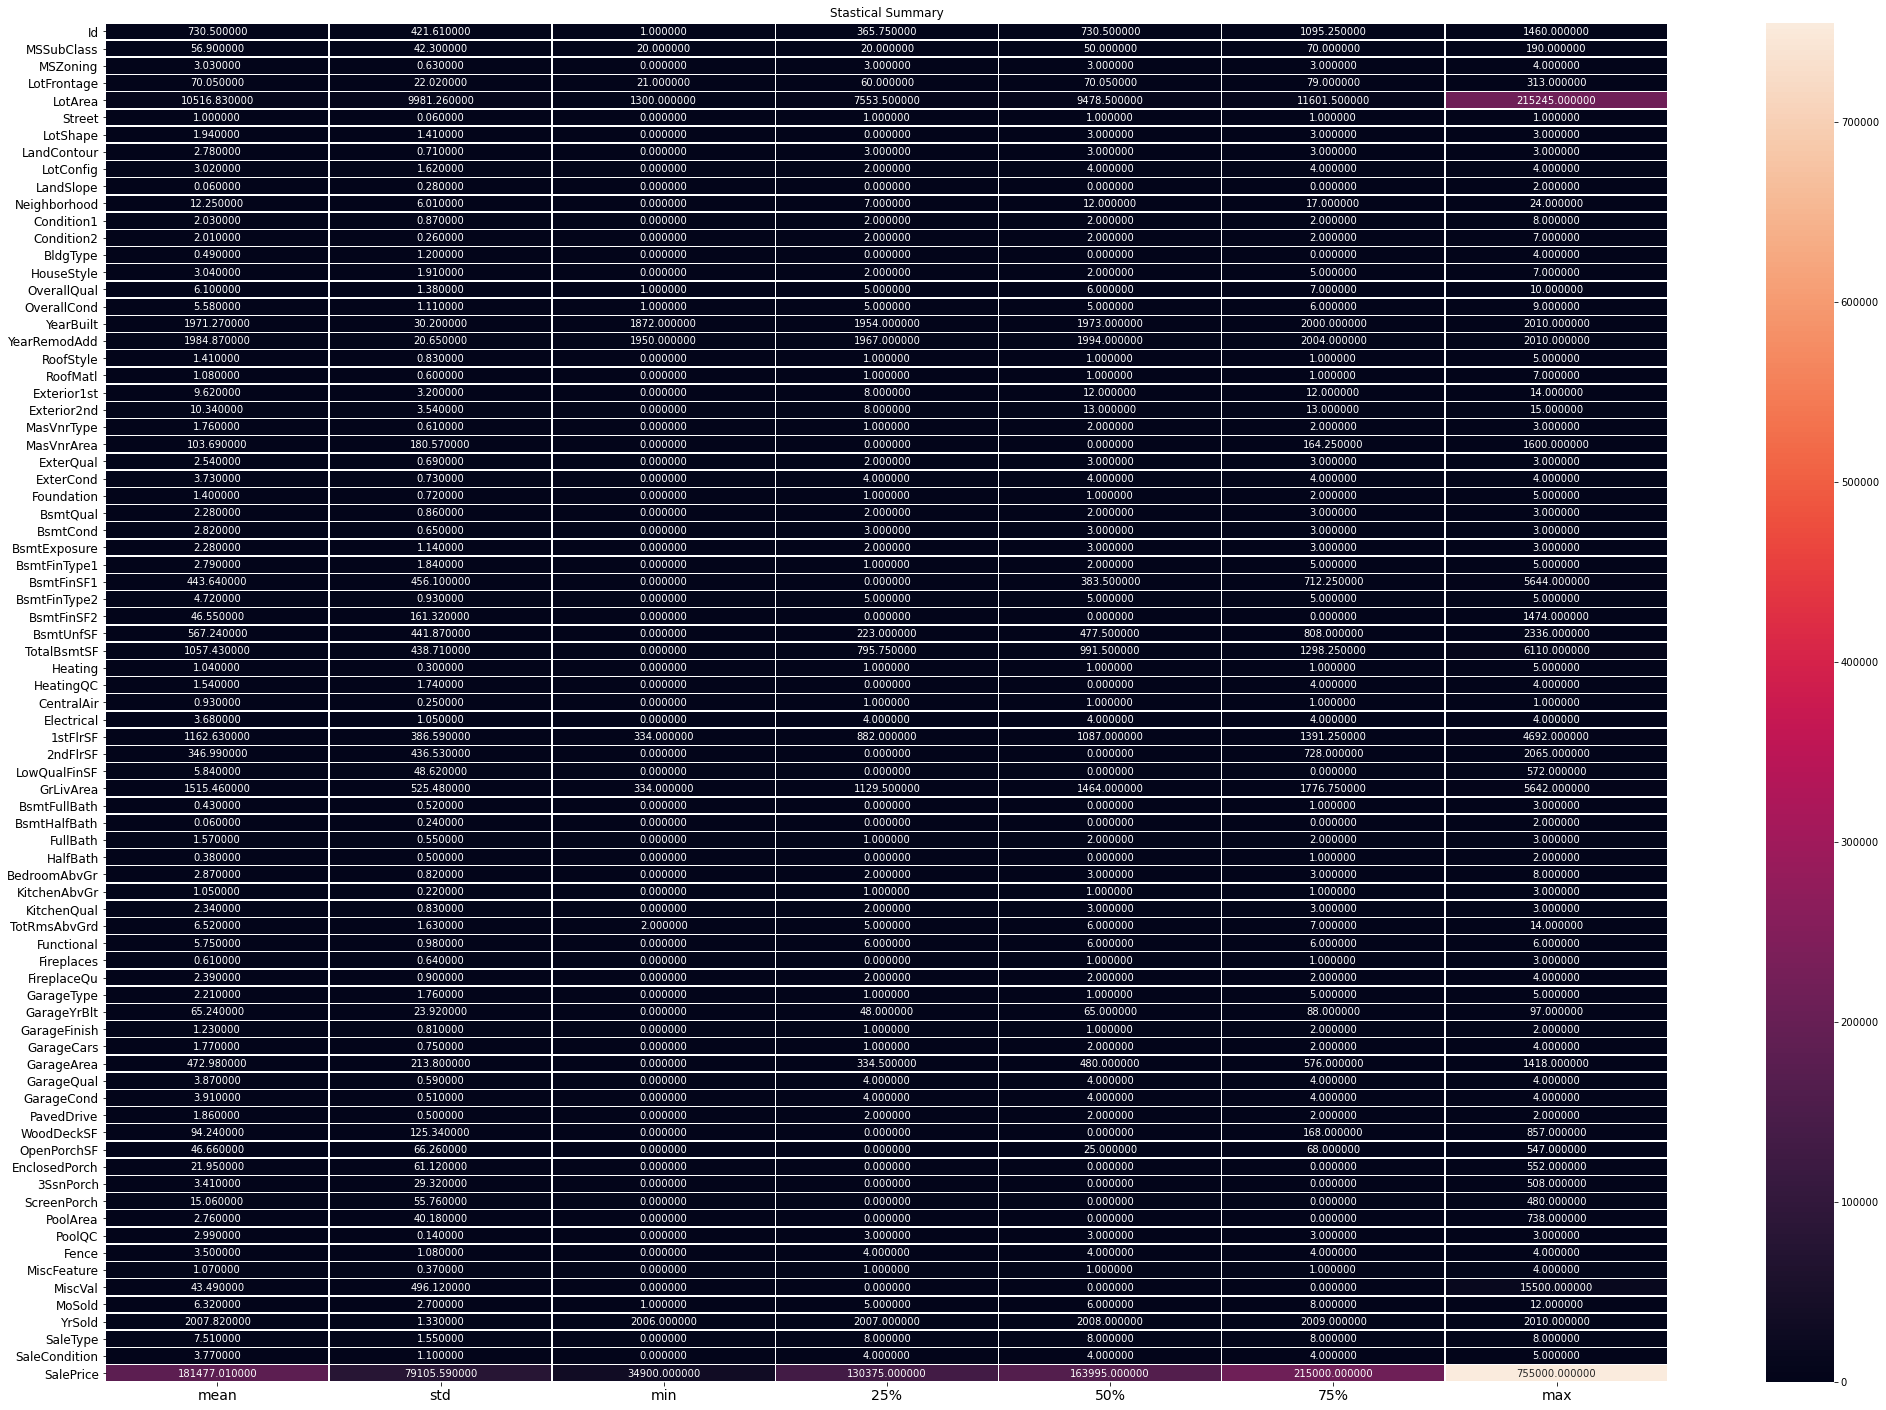

In [114]:
# Plotting heatmap for the stastical summary

plt.figure(figsize=[35,25])
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Stastical Summary')
plt.show()

In [115]:
#Checking for the correlation
df.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.006096    -0.009601 -0.033226   
MSSubClass     0.011156    1.000000  0.035900    -0.357056 -0.139781   
MSZoning      -0.006096    0.035900  1.000000    -0.106363 -0.034452   
LotFrontage   -0.009601   -0.357056 -0.106363     1.000000  0.306795   
LotArea       -0.033226   -0.139781 -0.034452     0.306795  1.000000   
Street         0.008916   -0.024969  0.087654    -0.037323 -0.197131   
LotShape       0.032122    0.119289  0.061887    -0.144931 -0.165315   
LandContour   -0.019659   -0.002940 -0.017854    -0.075647 -0.149083   
LotConfig      0.049756    0.075910 -0.009895    -0.181253 -0.121161   
LandSlope      0.005847   -0.025672 -0.022055     0.067608  0.436868   
Neighborhood  -0.013735   -0.005985 -0.249679     0.084545  0.044569   
Condition1    -0.003815   -0.024762 -0.027874    -0.008483  0.023846   
Condition2     0.001839   -0.042395  0.044606     0.003214  0.022164   
BldgType       0.021912    0.746063  0.005690    -0.408564 -0.205721   
HouseStyle     0.018111    0.397161 -0.105315     0.031907 -0.033190   
OverallQual   -0.028365    0.032628 -0.160099     0.234196  0.105806   
OverallCond    0.012609   -0.059316  0.186951    -0.052820 -0.005636   
YearBuilt     -0.012713    0.027850 -0.308908     0.117598  0.014228   
YearRemodAdd  -0.021998    0.040581 -0.174728     0.082746  0.013788   
RoofStyle      0.038675   -0.117817 -0.000301     0.153467  0.077054   
RoofMatl      -0.022562   -0.031336  0.005133     0.082026  0.149837   
Exterior1st   -0.034694   -0.089159 -0.008558     0.074448  0.004256   
Exterior2nd   -0.042847   -0.137229  0.006963     0.098756 -0.003930   
MasVnrType     0.051971   -0.029850 -0.028279    -0.020220 -0.008122   
MasVnrArea    -0.050199    0.022895 -0.066766     0.179283  0.103960   
ExterQual      0.001689   -0.017161  0.200536    -0.183293 -0.057275   
ExterCond      0.029826   -0.003254 -0.096041     0.047951  0.015160   
Foundation     0.008514    0.058126 -0.235174     0.098809 -0.011081   
BsmtQual       0.051070   -0.041065  0.128245    -0.168367 -0.065150   
BsmtCond       0.006762   -0.013652 -0.010528     0.051534  0.012366   
BsmtExposure  -0.024613   -0.064221  0.037209    -0.124127 -0.141043   
BsmtFinType1   0.014204    0.016599  0.024688    -0.025233 -0.061880   
BsmtFinSF1    -0.005024   -0.069836 -0.049128     0.215828  0.214103   
BsmtFinType2   0.045159    0.041195 -0.031718    -0.026775 -0.068954   
BsmtFinSF2    -0.005968   -0.065649  0.028086     0.043340  0.111170   
BsmtUnfSF     -0.007940   -0.140759 -0.046749     0.122156 -0.002618   
TotalBsmtSF   -0.015415   -0.238518 -0.087834     0.363358  0.260833   
Heating        0.042120    0.048009  0.056866    -0.020815  0.028158   
HeatingQC      0.002157    0.020760  0.134279    -0.079975  0.004212   
CentralAir     0.009821   -0.101774 -0.049523     0.068666  0.049755   
Electrical     0.037632    0.051945 -0.070818     0.060213  0.043856   
1stFlrSF       0.010496   -0.251758 -0.055614     0.414266  0.299475   
2ndFlrSF       0.005590    0.307886 -0.051481     0.072483  0.050986   
LowQualFinSF  -0.044230    0.046474  0.011520     0.036849  0.004779   
GrLivArea      0.008273    0.074853 -0.082615     0.368392  0.263116   
BsmtFullBath   0.002289    0.003491 -0.018526     0.091481  0.158155   
BsmtHalfBath  -0.020155   -0.002333  0.007193    -0.006419  0.048046   
FullBath       0.005587    0.131608 -0.198290     0.180424  0.126031   
HalfBath       0.006784    0.177354 -0.133876     0.048258  0.014259   
BedroomAbvGr   0.037719   -0.023438 -0.016471     0.237023  0.119690   
KitchenAbvGr   0.002951    0.281721  0.049434    -0.005805 -0.017784   
KitchenQual   -0.004432    0.010129  0.128976    -0.189082 -0.057018   
TotRmsAbvGrd   0.027239    0.040380 -0.043200     0.320146  0.190015   
Functional    -0.001064    0.003711 -0.095722     0.030250 -0.022317   
Fireplaces    -0.019772   -0.045569 -0.011349     0.235755  0

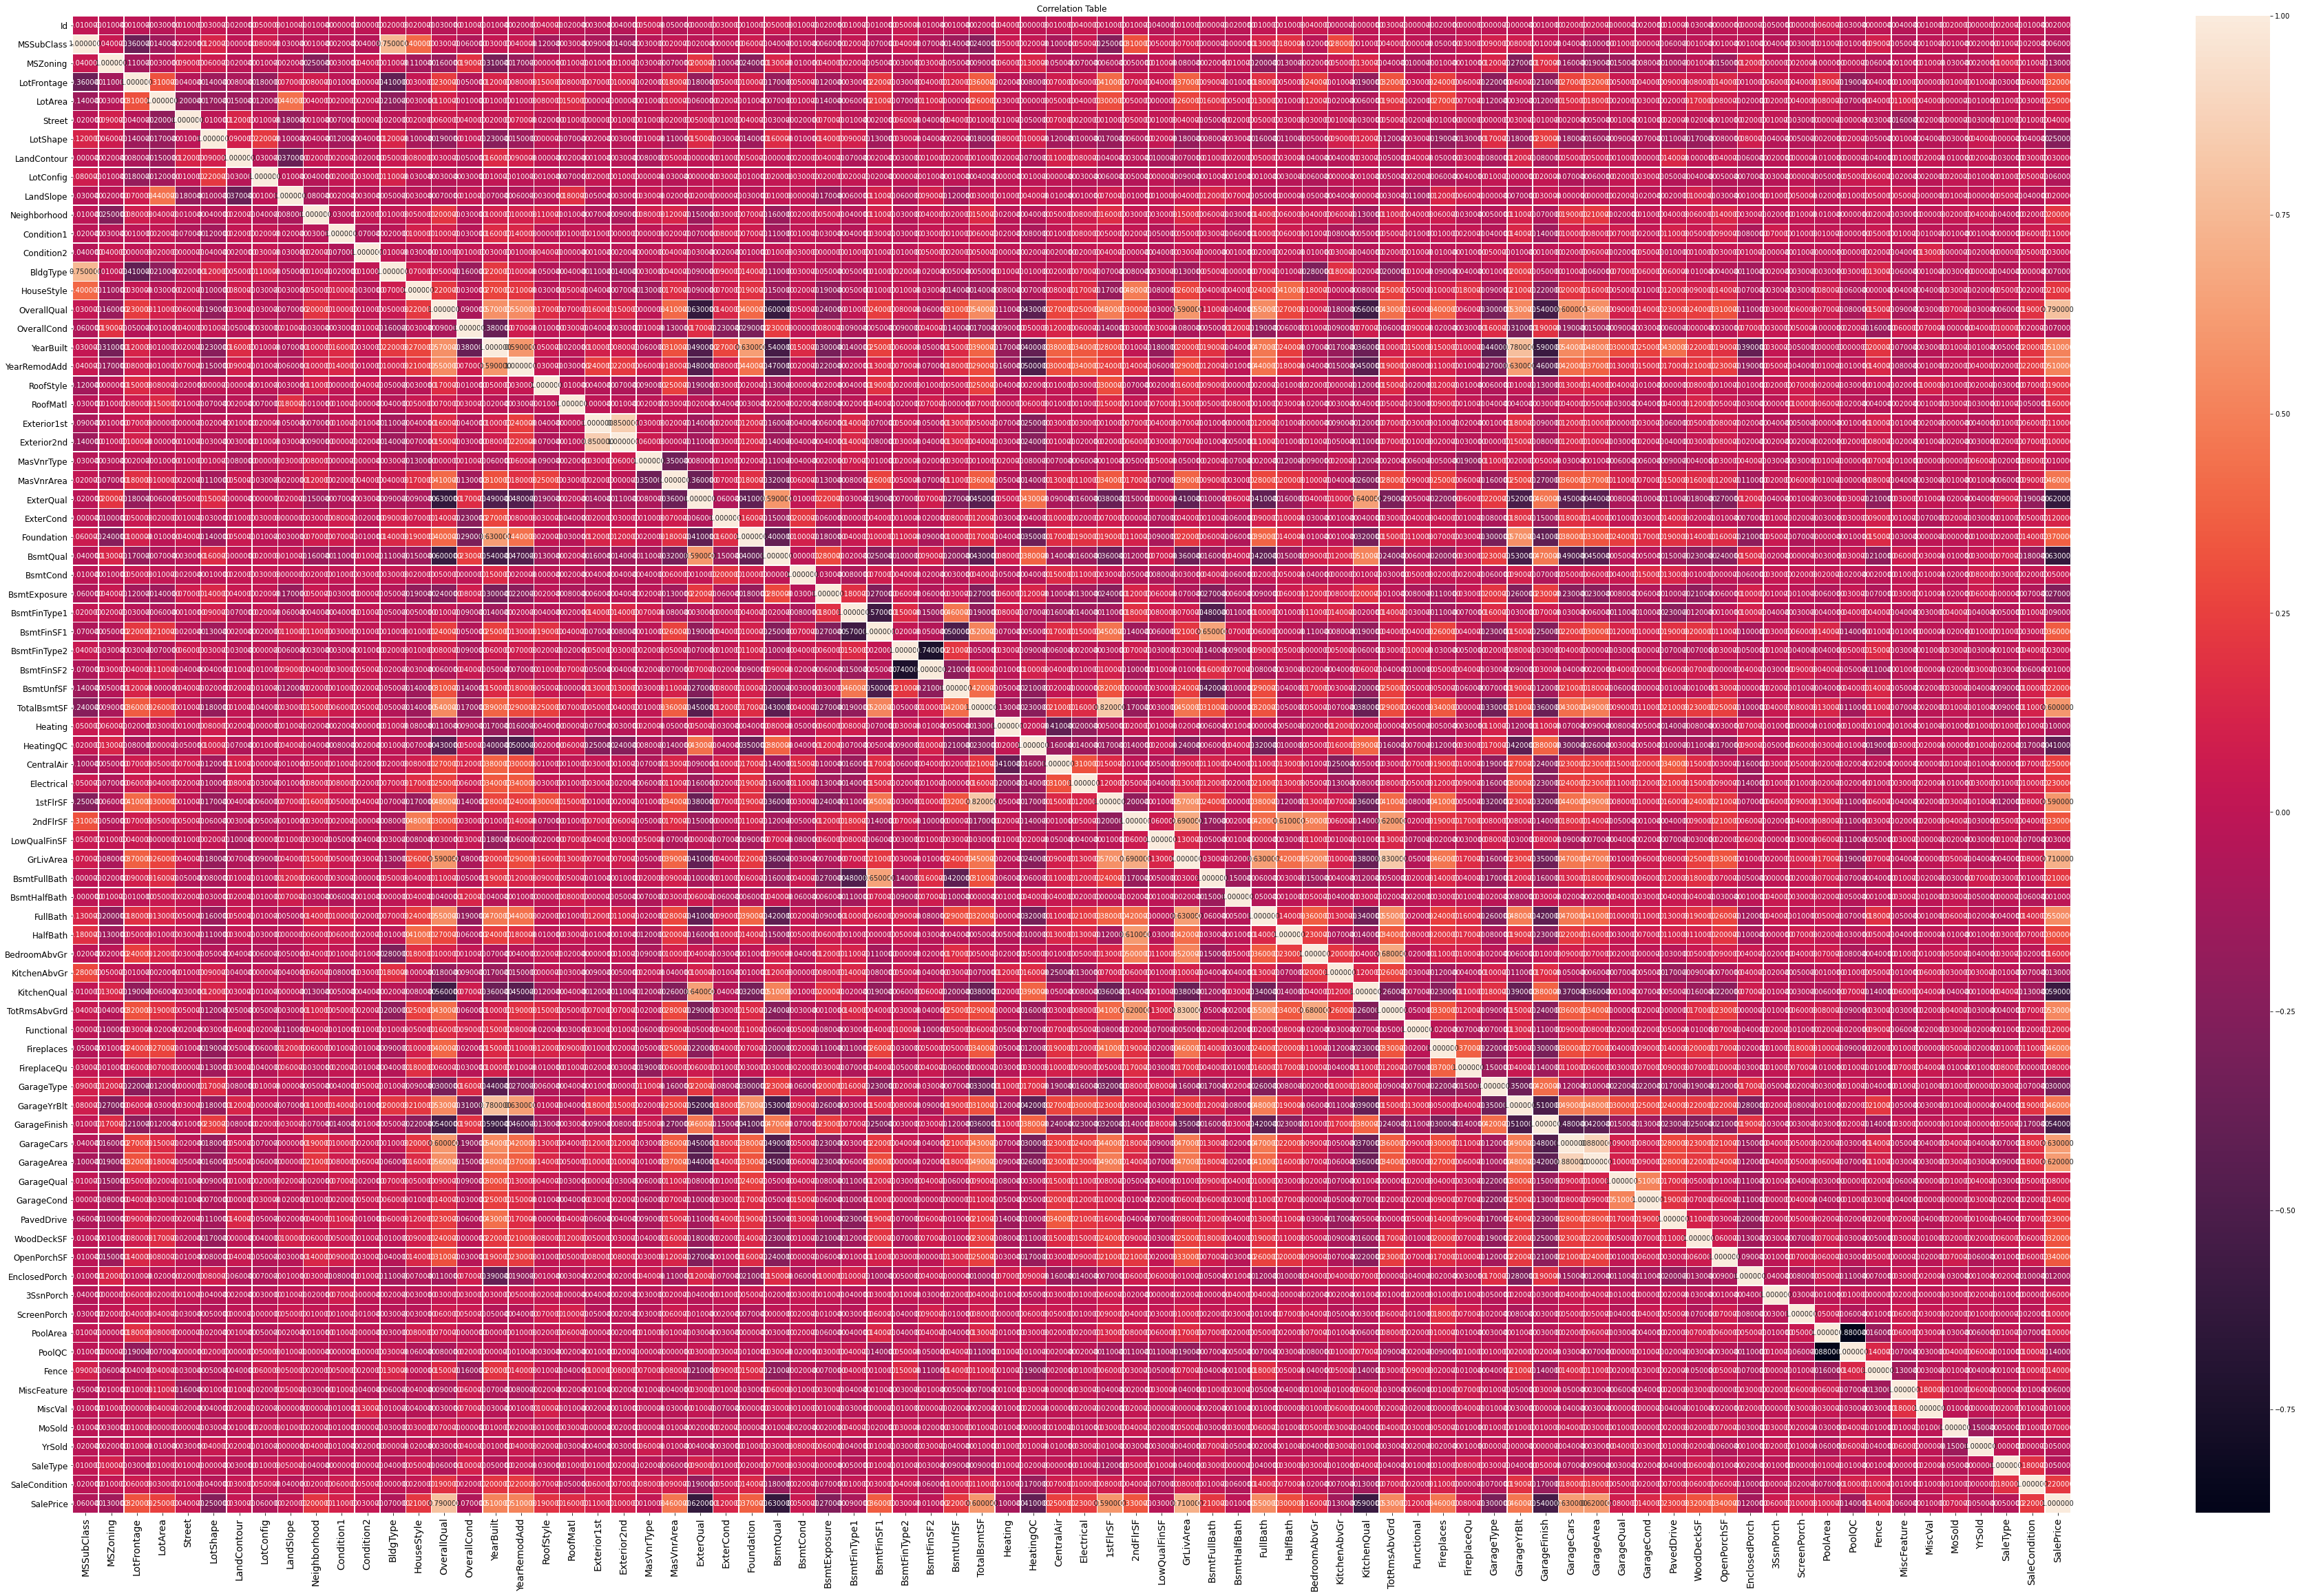

In [116]:
# plotting heatmap to show the correlation table 
plt.figure(figsize=[65,40])
sns.heatmap(round(df.corr()[1:].transpose(),2), annot= True, linewidths=0.45, linecolor='white', fmt='f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.title('Correlation Table')
plt.show()

#  Splitting the dataset into training and test dataset:

In [117]:
#training dataset:
train_data = df[:1168]
train_data.tail()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1163  289          20         3    70.049958     9819       1         0   
1164  554          20         3    67.000000     8777       1         3   
1165  196         160         3    24.000000     2280       1         3   
1166   31          70         0    50.000000     8500       1         3   
1167  617          60         3    70.049958     7861       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1163            3          4          0            19           2           2   
1164            3          4          0             7           1           2   
1165            3          2          0            13           2           2   
1166            3          4          0             9           1           2   
1167            3          4          0             8           2           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1163         0           2            5            5       1967          1967   
1164         0           2            4            5       1949          2003   
1165         3           5            6            6       1976          1976   
1166         0           5            4            4       1920          1950   
1167         0           5            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1163          1         1            8            8           1        31.0   
1164          1         1           12           13           2         0.0   
1165          1         1            9            2           2         0.0   
1166          2         1            3            3           2         0.0   
1167          1         1           12           13           2         0.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1163          3          2           1         3         3             3   
1164          3          4           1         3         3             3   
1165          3          4           1         2         3             3   
1166          3          1           0         3         3             3   
1167          2          4           2         2         3             3   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1163             1         450             5           0        432   
1164             5           0             5           0          0   
1165             0         566             5           0        289   
1166             5           0             5           0        649   
1167             2         457             5           0        326   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1163          882        1          4           1           4       900   
1164            0        1          0           1           4      1126   
1165          855        1          4           1           4       855   
1166          649        1          4           0           4       649   
1167          783        1          0           1           4       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1163         0             3             1            3             5   
1164         0             2             1            2             5   
1165         1             3             1            3           

In [118]:
#test dataset:
test_data = df[1168:]
test_data = test_data.drop(['SalePrice'],axis=1)
test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1168   337          20         3    86.000000    14157       1         0   
1169  1018         120         3    70.049958     5814       1         0   
1170   929          20         3    70.049958    11838       1         3   
1171  1148          70         3    75.000000    12000       1         3   
1172  1227          60         3    86.000000    14598       1         0   

      LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
1168            1          0          0            22           2           2   
1169            3          1          0            22           2           2   
1170            3          4          0             5           2           2   
1171            0          4          0             6           2           2   
1172            3          1          0            21           1           2   

      BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1168         0           2            9            5       2005          2006   
1169         4           2            8            5       1984          1984   
1170         0           2            8            5       2001          2001   
1171         0           5            7            7       1941          1950   
1172         0           5            6            5       2007          2007   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
1168          3         1           12           13           3       200.0   
1169          1         1            6            6           2         0.0   
1170          3         1           12           13           2         0.0   
1171          1         1            8            8           2         0.0   
1172          1         1           12           13           3        74.0   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
1168          2          4           2         0         3             1   
1169          2          4           1         2         3             0   
1170          2          4           2         2         3             0   
1171          3          4           1         3         3             3   
1172          2          4           2         2         3             2   

      BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1168             2        1249             5           0        673   
1169             2        1036             5           0        184   
1170             5           0             5           0       1753   
1171             4         275             5           0        429   
1172             5           0             5           0        894   

      TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
1168         1922        1          0           1           4      1922   
1169         1220        1          2           1           4      1360   
1170         1753        1          0           1           4      1788   
1171          704        1          0           1           4       860   
1172          894        1          0           1           4       894   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1168         0             0       1922             1             0         2   
1169         0             0       1360             1             0         1   
1170         0             0       1788             0             0         2   
1171       704             0       1564             0             0         1   
1172      1039             0       1933             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
1168         0             3             1            2             8   
1169         0             1             1            2             4   
1170         0             3             1            0      

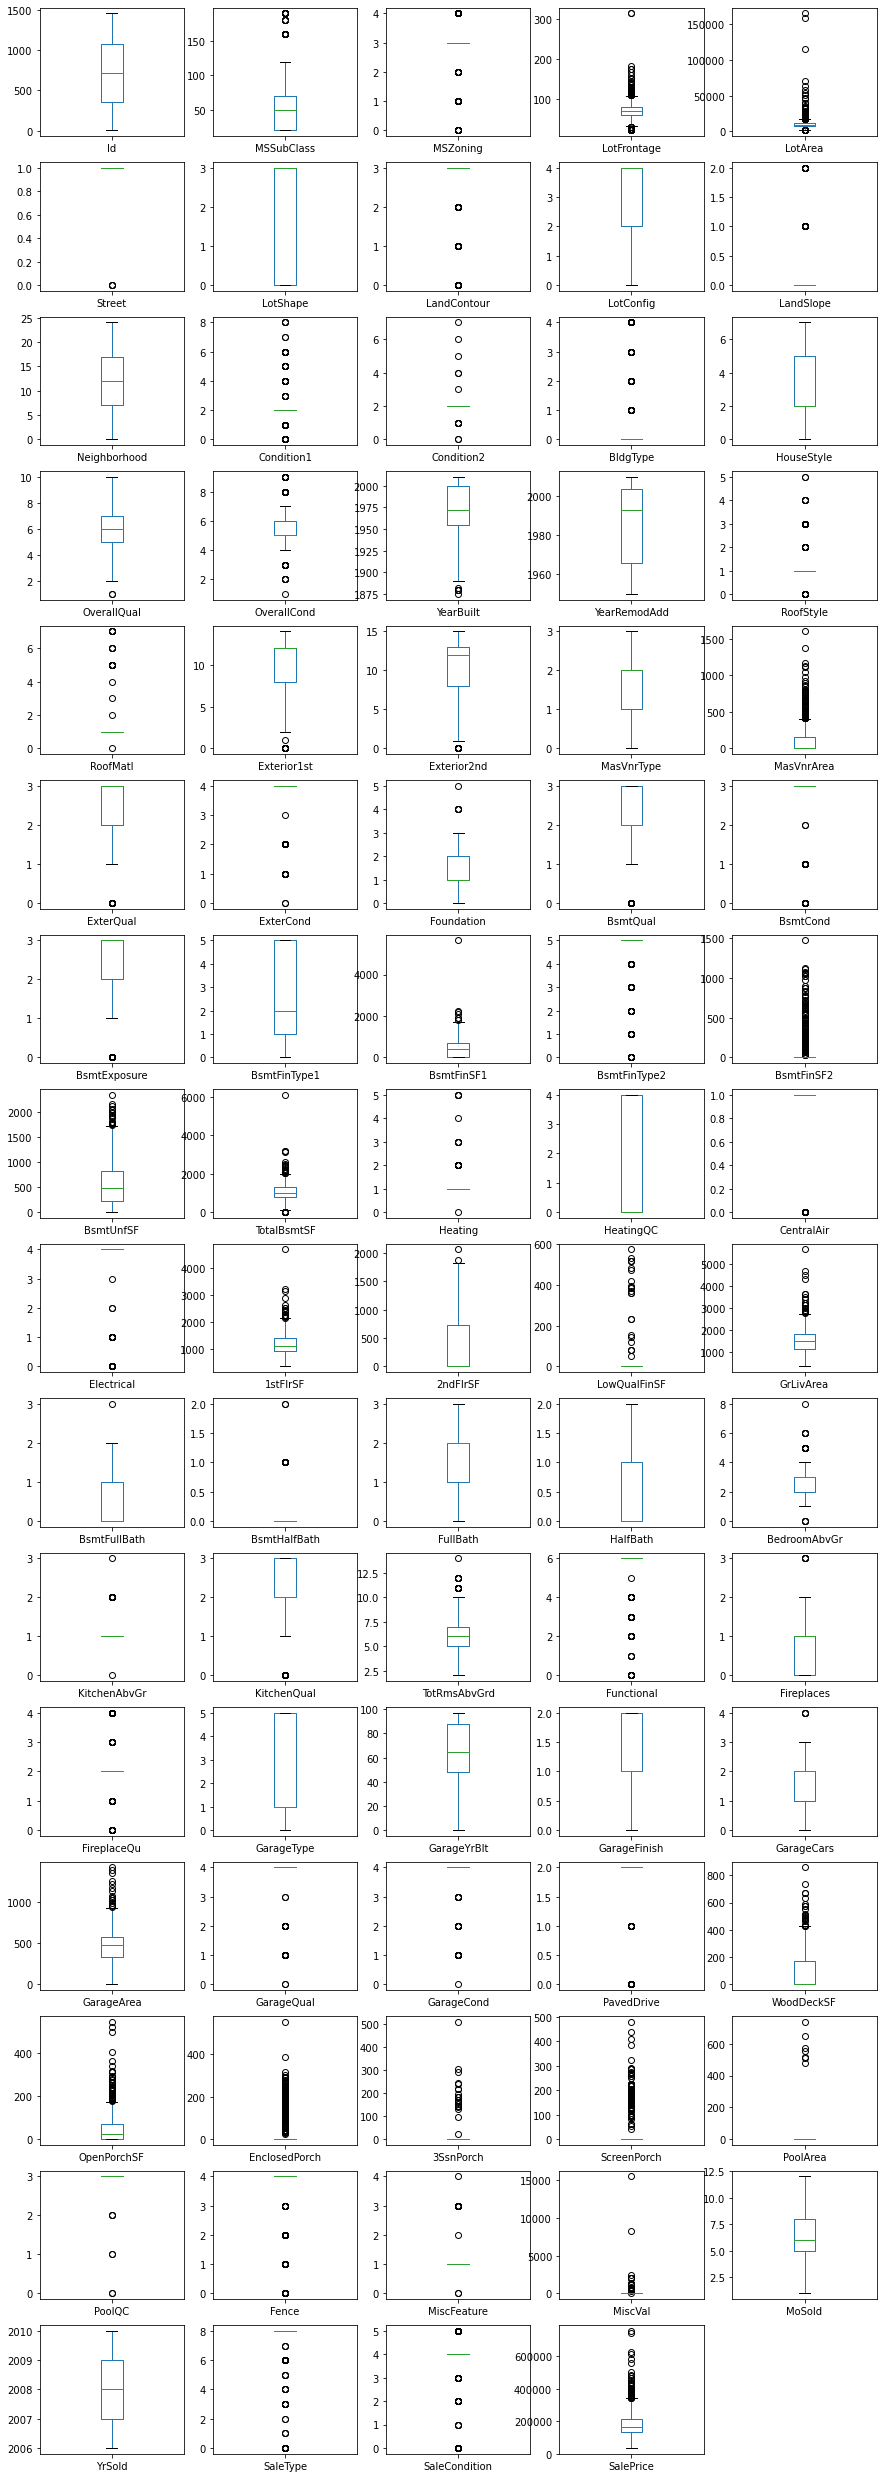

In [119]:
# Checking for the skewness & Outliers: (Training dataset)
train_data.plot(kind='box', subplots=True, layout=(16,5), sharex=False, legend=True, figsize=(15,45))
plt.show()

Taking the threshold value for the skewness as +/-0.5. We can say that our dataset have skewness

In [120]:
# Removing Outliers
from scipy.stats import zscore
z = np.abs(zscore(train_data))
z.shape

(1168, 79)

In [121]:
thershold = 6
print(np.where (z>6))

(array([   1,   20,   22,   32,   32,   33,   51,   51,   63,   66,   95,
         98,  103,  103,  103,  103,  113,  113,  119,  119,  141,  141,
        141,  142,  206,  211,  211,  214,  214,  226,  228,  253,  255,
        272,  279,  310,  310,  310,  320,  333,  356,  361,  363,  370,
        396,  418,  429,  441,  441,  443,  463,  478,  481,  488,  493,
        500,  500,  507,  510,  532,  534,  544,  553,  562,  563,  572,
        572,  572,  572,  591,  592,  592,  592,  592,  592,  592,  592,
        614,  614,  637,  639,  652,  686,  689,  689,  691,  691,  699,
        713,  716,  721,  722,  759,  769,  794,  821,  823,  823,  824,
        833,  833,  834,  839,  846,  888,  897,  899,  911,  920,  920,
        935,  944,  952,  952,  956,  961, 1008, 1023, 1038, 1038, 1046,
       1047, 1053, 1053, 1080, 1082, 1094, 1098, 1108, 1120, 1120, 1120,
       1120, 1123, 1123, 1123, 1139, 1142], dtype=int64), array([20, 67, 34, 12, 73, 43, 65, 68, 67, 43, 34, 67, 20, 43, 61

In [122]:
# Assigning the values to df_new which are less of thershold value and removing the outliers
train_new = train_data[(z<6).all(axis=1)]
print(train_data.shape)
print(train_new.shape)

print ('Shape after removing the outliers is ', train_new.shape)

(1168, 79)
(1068, 79)
Shape after removing the outliers is  (1068, 79)


In [123]:
# Checking percentage of data loss:
loss_per = ((1168-1069)/1168)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  8.476027397260275


In [124]:
# Dividing the independent and dependent variables
x=train_data.drop('SalePrice',axis=1)
y=train_data['SalePrice']

In [125]:
# Checking for the skewness.
x.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.732333
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.750566
Exterior2nd      -0.699672
MasVnrType       -0.104609
MasVnrArea        2.834520
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

In [126]:
#Using power_transform function we'll try to remove the skewness from the dataset
from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[-1.54496771,  1.37043472, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.46194084, -1.16799937, -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       [ 0.25422089,  0.4900471 , -0.16245555, ..., -0.60480623,
         0.40906852,  0.02973497],
       ...,
       [-1.30033656,  1.70079775, -0.16245555, ...,  0.89957552,
         0.40906852,  0.02973497],
       [-1.97567978,  0.69655685, -2.92646435, ...,  0.14807039,
         0.40906852,  0.02973497],
       [-0.14748082,  0.4900471 , -0.16245555, ..., -1.3590026 ,
         0.40906852,  0.02973497]])

# Model Building


In [128]:
# x train, y train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=45)

# 1. LinearRegression:

In [129]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression( fit_intercept = True)

LR.fit(x_train, y_train)
print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")

Linear coefficients : [-6.17372846e+02 -3.49899509e+03  1.42979564e+03  4.92780723e+02
  8.37957095e+03  2.00402123e+03  1.24338938e+02  1.46304817e+03
 -5.25345320e+01  2.10570113e+03  1.94204204e+03 -4.57873241e+02
 -2.40990213e+03  6.94835536e+02  9.47444745e+02  1.63368992e+04
  5.04063827e+03 -2.24271531e+03  4.19981753e+02  3.30212146e+03
  8.80701310e+02 -2.25264787e+03 -1.08649870e+03  8.79198939e+02
 -6.15130715e+02 -5.96594016e+03 -8.34162942e+01  3.14692898e+03
 -4.75834709e+03  8.76290859e+02 -3.43546953e+03  1.44944521e+03
  3.82519096e+03  1.93114271e+04  1.64415516e+04 -7.67374961e+03
  1.42595874e+04 -1.71781511e+03 -2.96978380e+03 -1.29457593e+03
 -1.86539576e+03  4.98982613e+03  3.62704124e+03 -2.58368150e+02
  1.46165864e+04  1.24069469e+03 -1.71629524e+03  2.34150662e+03
  4.89361041e+03 -3.36805911e+03 -5.82584353e+03 -5.05566621e+03
  4.95665009e+03  3.53222186e+03  3.92127320e+03 -2.12300389e+03
  2.05204070e+03  3.72398659e+03 -6.90598374e+02  7.21471624e+03
 -4

In [130]:
# Predicting the new result
LR_pred = LR.predict(x_test)
LR_pred

array([115081.0868576, 162711.0868576, 169959.0868576, 236199.0868576,
        84225.0868576, 157333.0868576, 184096.0868576, 130162.0868576,
       181811.0868576, 206812.0868576, 153109.0868576, 161276.0868576,
       210005.0868576, 156704.0868576, 186730.0868576, 174129.0868576,
       210904.0868576, 163334.0868576, 180847.0868576, 177188.0868576,
       128962.0868576, 260600.0868576, 216670.0868576, 260212.0868576,
       118746.0868576, 187311.0868576, 122398.0868576, 180734.0868576,
       134819.0868576, 159393.0868576, 117061.0868576, 187791.0868576,
       218394.0868576, 137540.0868576, 106413.0868576, 270679.0868576,
       266147.0868576, 203749.0868576,  99795.0868576, 348028.0868576,
       134027.0868576, 178416.0868576, 168481.0868576, 283625.0868576,
       141716.0868576, 121234.0868576,  52343.0868576, 107872.0868576,
        72165.0868576, 193020.0868576, 132090.0868576, 167500.0868576,
        63227.0868576, 106486.0868576, 131442.0868576,  83809.0868576,
      

# 2. Lasso

In [131]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x_train, y_train)

# Predicting the new results
ls_pred = ls.predict(x_test)
ls_pred

array([115092.5597165 , 162740.49552415, 169996.37578157, 236212.776684  ,
        84248.64586767, 157268.69905937, 184077.84045551, 130175.19703845,
       181850.88060351, 206794.18447276, 153295.83046712, 161238.80693344,
       210176.5806089 , 156660.39277361, 186723.58287722, 174024.0687367 ,
       210888.55238688, 163393.29781049, 180786.0788463 , 177141.06432686,
       128979.04982924, 260528.62457558, 216659.19934765, 260249.31896316,
       118688.99873907, 187284.32638501, 122434.85204276, 180793.98840421,
       134893.89162228, 159383.65707789, 117023.41996084, 187831.801507  ,
       218496.01603335, 137550.37848904, 106336.91273916, 270638.83697404,
       266134.33117068, 203767.90336311,  99820.69413694, 341294.08716428,
       134173.53728221, 178437.34890695, 168570.74048819, 283555.66011705,
       141746.96016358, 121355.21394202,  52349.37652821, 107903.38182575,
        72193.40908454, 193113.94212099, 132158.17223814, 167552.30147857,
        63314.36878358, 1

# 3. DecisionTreeRegressor:

In [132]:
from sklearn.tree import DecisionTreeRegressor #Importing the library
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

# Predicting the new result
DT_pred = DT.predict(x_test)
DT_pred

array([129900., 152000., 167900., 135000., 135000., 129500., 149900.,
       160000., 181000., 208500., 155000., 155000., 284000., 180500.,
       191000., 159895., 202500., 175500., 196000., 181000., 102000.,
       222000., 239000., 195000., 115000., 180000., 136500., 135000.,
       139000., 125000., 103200., 174000., 138500., 139000.,  76500.,
       318061., 270000., 191000., 143000., 318061., 155000., 178000.,
       165000., 367294., 107000., 108480., 125000., 130500.,  95000.,
       167000., 142500., 120000., 106000., 127000., 140000.,  83000.,
       269500., 112000.,  96500., 178740., 117000., 141000., 119000.,
       193000., 166000., 135000., 145900., 144000., 214500., 108000.,
       162000., 193879., 226000., 138500., 197000., 118000., 145000.,
       141000., 173000., 160000., 180000.,  85400., 293077., 106250.,
       159000., 333168., 122000., 132000., 149900., 277500., 159500.,
       124000.,  96500., 213490., 287000., 137000., 131500., 129500.,
       108000., 2430

# 4. KNeighborsRegressor

In [133]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

# Predicting the new result
KNN_pred = KNN.predict(x_test)
KNN_pred

array([135500. , 135500. , 162450. , 218000. , 107200. , 154400. ,
       184000. , 142450. , 190450. , 226350. , 134500. , 157450. ,
       196250. , 136950. , 193000. , 182400. , 243750. , 178250. ,
       146950. , 181000. , 124750. , 229895. , 212250. , 205000. ,
       140750. , 164250. , 139250. , 108500. , 137250. , 159500. ,
       130450. , 181500. , 463000. , 116000. , 108500. , 276000. ,
       261000. , 196000. , 138193.5, 217500. , 143500. , 208000. ,
       153500. , 209539. , 130500. , 127375. , 124100. , 143500. ,
       114250. , 148000. , 130950. , 168850. ,  88750. , 126075. ,
       138250. , 109250. , 289151. , 125950. , 139950. , 203750. ,
       131250. , 119450. , 125500. , 201950. , 116500. , 148000. ,
       127250. , 140250. , 170450. , 100752. , 137475. , 164858.5,
       201000. , 126500. , 206600. , 151000. , 155750. , 147000. ,
       181500. , 168750. , 215100. ,  68650. , 287999.5,  92500. ,
       183000. , 218000. , 139725. , 128700. , 211500. , 29870

# 5. RandomForestRegressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=42)
RF.fit(x_train,y_train)

# Predicting the new result
RF_pred = RF.predict(x_test)
RF_pred

array([138759.79623203, 156399.76394573, 158976.22311596, 152680.21635783,
       132074.04373159, 153278.65969789, 138759.79623203, 141616.85582672,
       156753.53643578, 211161.57701232, 141972.32518113, 154480.57777216,
       210667.49962095, 143410.97924738, 207870.5081785 , 207870.5081785 ,
       262805.23967901, 152727.13829037, 149471.43919444, 158588.17423801,
       145410.36292633, 217816.18058624, 154521.09215372, 213050.3150992 ,
       149714.0114453 , 262805.23967901, 138831.3363769 , 209203.47906002,
       146166.05728152, 143806.96298335, 136181.64019744, 157386.25616374,
       143063.444751  , 137864.72871528, 147202.78948263, 277657.55909652,
       272679.81360692, 209087.88568858, 146501.4824962 , 295985.13962701,
       137864.72871528, 151306.07699667, 147198.48053082, 267081.46367682,
       144666.84469397, 134304.66526979, 132074.04373159, 136529.17469383,
       132074.04373159, 205522.50513818, 132817.56196395, 144160.7354734 ,
       146855.25498625, 1

# Mean Absolute Error:

In [135]:
from sklearn.metrics import mean_absolute_error

print(' Mean Absolute Error for LinearRegression is ', mean_absolute_error(y_test, LR_pred),
      '\n Mean Absolute Error for the Lasso is ', mean_absolute_error(y_test, ls_pred),
     '\n Mean Absolute Error for DecisionTreeRegressor is ', mean_absolute_error(y_test, DT_pred),
     '\n Mean Absolute Error for KNeighborsRegressor is ', mean_absolute_error(y_test, KNN_pred),
      '\n Mean Absolute Error for RandomForestRegressor is ', mean_absolute_error(y_test, RF_pred))

 Mean Absolute Error for LinearRegression is  22797.885919398235 
 Mean Absolute Error for the Lasso is  22770.29958080592 
 Mean Absolute Error for DecisionTreeRegressor is  28011.478632478633 
 Mean Absolute Error for KNeighborsRegressor is  29805.972222222223 
 Mean Absolute Error for RandomForestRegressor is  30272.071502466653


We can see that the Mean Absolute error is least for Lasso ( 22770.29958080592), so this can be considered as good model.
LinearRegression is ( 22797.885919398235), which is almost equal to the Lasso. So, let's check for Root Mean Squared Error and R2_Score to decide the best model.

# Root Mean Square Error

In [136]:
from sklearn import metrics

rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
rmse_ls = np.sqrt(metrics.mean_squared_error(y_test, ls_pred))
rmse_DT = np.sqrt(metrics.mean_squared_error(y_test, DT_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, RF_pred))

print('Root Mean Squared Error for LinearRegression is ', rmse_LR)
print('Root Mean Squared Error for Lasso is ', rmse_ls)
print('Root Mean Squared Error for DecisionTreeRegressor is ', rmse_DT)
print('Root Mean Squared Error for KNeighborsRegressor is ', rmse_KNN)
print('Root Mean Squared Error for RandomForestRegressor is ', rmse_RF)

Root Mean Squared Error for LinearRegression is  47444.59363889269
Root Mean Squared Error for Lasso is  47380.18137207293
Root Mean Squared Error for DecisionTreeRegressor is  41904.20496799814
Root Mean Squared Error for KNeighborsRegressor is  53561.79470868763
Root Mean Squared Error for RandomForestRegressor is  49196.34909575069


Root Mean Squared Error for Lasso is  47380.18137207293 which is minimum.

# R-Squared

In [138]:
from sklearn.metrics import r2_score

print(' R2_Score for LinearRegression is ', r2_score(y_test, LR_pred),
      '\n R2_Score for the Lasso is', r2_score(y_test, ls_pred),
      '\n R2_Score for DecisionTreeRegressor is ', r2_score(y_test, DT_pred),
      '\n R2_Score for KNeighborsRegressor is ', r2_score(y_test, KNN_pred), 
      '\n R2_Score for RandomForestRegressor is ', r2_score(y_test, RF_pred))

 R2_Score for LinearRegression is  0.7006347909847168 
 R2_Score for the Lasso is 0.7014470943803457 
 R2_Score for DecisionTreeRegressor is  0.7664697871111138 
 R2_Score for KNeighborsRegressor is  0.6184617304143298 
 R2_Score for RandomForestRegressor is  0.678120280889251


R2_Score closest to 1.0 is considered as best. From the above observations we can see that the best R2_Score is for LinearRegression and Lasso (0.70144). So we can go ahead with Lasso.

# Model Saving

In [139]:
import pickle
filename = 'housing_price.pkl'
pickle.dump(ls, open(filename, 'wb'))

# Conclusion:

In [140]:
a = np.array(y_test)
predicted = np.array(ls.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

Original      Predicted
0    129000.0  115092.559716
1    165150.0  162740.495524
2    180000.0  169996.375782
3    224000.0  236212.776684
4     82500.0   84248.645868
5    176000.0  157268.699059
6    165500.0  184077.840456
7    148000.0  130175.197038
8    200500.0  181850.880604
9    216000.0  206794.184473
10   156000.0  153295.830467
11   171000.0  161238.806933
12   200000.0  210176.580609
13   140000.0  156660.392774
14   178000.0  186723.582877
15   162000.0  174024.068737
16   189000.0  210888.552387
17   175000.0  163393.297810
18   153500.0  180786.078846
19   179000.0  177141.064327
20   141500.0  128979.049829
21   268000.0  260528.624576
22   239000.0  216659.199348
23   219210.0  260249.318963
24   104000.0  118688.998739
25   174000.0  187284.326385
26   154900.0  122434.852043
27   178000.0  180793.988404
28   103600.0  134893.891622
29   155000.0  159383.657078
30   112500.0  117023.419961
31   185000.0  187831.801507
32   171000.0  218496.016033
33   134900.0  137550.378489
34   107400.0  106336.912739
35   257000.0  270638.836974
36   266000.0  266134.331171
37   187100.0  203767.903363
38   108000.0   99820.694137
39   284000.0  341294.087164
40   134000.0  134173.537282
41   176432.0  178437.348907
42   161500.0  168570.740488
43   264561.0  283555.660117
44   130000.0  141746.960164
45   115000.0  121355.213942
46    80000.0   52349.376528
47   133900.0  107903.381826
48    89000.0   72193.409085
49   175500.0  193113.942121
50   137000.0  132158.172238
51   173733.0  167552.301479
52    98000.0   63314.368784
53   160000.0  106436.931561
54   148000.0  131458.020096
55   109900.0   83780.715801
56   339750.0  297302.359336
57   125500.0  123417.991147
58   100000.0   53057.735350
59   234000.0  194793.933748
60   138000.0  138537.153901
61   109008.0  102464.190714
62    60000.0   91809.820299
63   172500.0  189876.891812
64   128500.0  159693.415356
65   148000.0  147007.452098
66   107500.0  139760.615657
67   140000.0  153982.935778
68   139000.0  134714.321247
69   110000.0  104395.040554
70   160000.0  146063.924659
71   155835.0  210245.762413
72   213500.0  219427.301350
73   107000.0  119786.077820
74   205950.0  209157.970365
75   139000.0  112336.891841
76   225000.0  201228.400986
77   119500.0  122966.387368
78   189000.0  209411.179929
79   179400.0  158386.356014
80   213500.0  218400.532554
81    60000.0    8412.102980
82   290000.0  294957.277127
83    40000.0   61060.232043
84   165000.0  164506.979275
85   267000.0  264252.278007
86   129000.0  123953.806125
87   135000.0  126756.402247
88   170000.0  169185.060660
89   274000.0  295661.749393
90   140000.0  138768.844116
91   179000.0  145419.200359
92    82000.0   58436.425557
93   226000.0  235517.869303
94   340000.0  285736.796799
95   118000.0  132298.925668
96   144000.0  131736.972481
97   128000.0  129731.041452
98   127500.0   84716.642825
99   235000.0  218995.889765
100  611657.0  403963.880390
101  755000.0  429259.908659
102  135000.0  141888.512638
103  240000.0  210612.771601
104  134500.0  118626.998587
105   67000.0   66673.015017
106  120000.0  165994.139592
107  167900.0  185345.496001
108  200000.0  191826.943466
109  261500.0  280468.857110
110  315000.0  342865.721576
111  210000.0  185489.657628
112  133000.0  139904.874808
113   98000.0  103130.971285
114  255000.0  258278.472156
115  151000.0  161275.295592
116  127500.0  197614.696031
117  207500.0  207086.737757
118  303477.0  299819.697879
119  272000.0  258448.802121
120  160000.0  151615.705043
121  386250.0  355241.576406
122  130500.0  129704.591370
123  135000.0  207317.059780
124  188000.0  159984.303566
125  140000.0  125536.299891
126   62383.0  105882.539358
127  306000.0  282238.371690
128  145000.0  142314.950115
129  225000.0  239367.936510
130  320000.0  297888.186110
131  212900.0  240056.720684
132  402861.0  373975.683557
133   94750.0  107355.308360
134  175000.0  204473.575828
135  128200.0  114068.127403
136  200100.0  182245.333994
137

<AxesSubplot:ylabel='Density'>

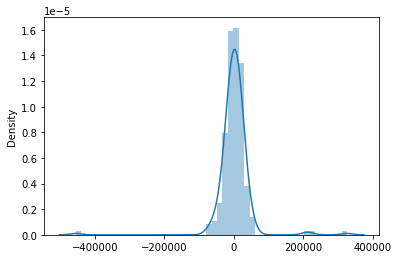

In [141]:
sns.distplot(a-predicted)

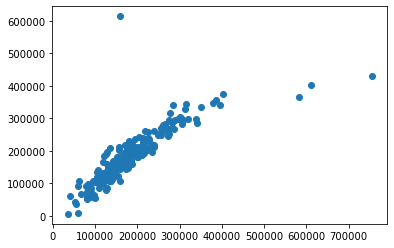

In [142]:
# We are getting an almost normal distribution in our predicted values
plt.scatter(a,predicted)